In [1]:
#爬蟲工具
from bs4 import BeautifulSoup
import requests
import pandas as pd

allti=[]
for page in range(3809, 3853):  # 執行3809~3853頁
 
    # 連結網站
    response = requests.get(
        "https://www.ptt.cc/bbs/basketballTW/index" + str(page)+'.html')
 
    # HTML原始碼解析
    soup = BeautifulSoup(response.text, "html.parser")
 
    # 取得所有class為title的div
    titles = soup.find_all("div", {"class": "title"})
    for title in titles:
        allti.append((title.text.strip()))
print(allti)

['[情報] 獵鷹愛德華離隊', '[情報] 漢來美食海神首勝同慶禮 下載APP領優惠', '[新聞] SBL、WSBL首度合併舉行 熱身賽12/27登場', '[閒聊] 如果有出實體遊戲？', '[新聞] 免費仔快看！SBL,WSBL 12月台北辦熱身賽', '[閒聊] 夢想家與Converse第三季再次合作', '[討論] 谷毛唯嘉是不是未來的台鋼皇帝', '[情報] 艾迪 FB - 里維羅(Ricci Rivero)相關動態', '[閒聊] PLG Week1 Top 10 Plays', '[問題] 請問"皇帝"跟台鋼的關聯性', '[新聞] 重磅！那個男人來了\u3000霍華德加盟桃園雲豹', '[新聞] 震撼台灣籃壇！ 「魔獸」豪爾德加盟桃園', '[閒聊] 這是台籃史上最扯的補強嗎', 'Re: [新聞] 重磅！那個男人來了\u3000霍華德加盟桃園雲豹', '[閒聊] 假如林書豪回來vs魔獸會想看誰', '[閒聊] 魔獸來台打T1，場均數據會多少？', '[閒聊] 為何中信跟富邦搶不到魔獸?', '[討論]如果真的來DH應該是亞洲史上最大咖洋將巴?', '[閒聊] 魔獸加盟t1', '[問題] 小四講的真的很實在了吧？', '[閒聊] 黑哥這次輸了', 'Re: [閒聊] 為何中信跟富邦搶不到魔獸?', '[閒聊] 幫P+找好台階了', '[閒聊] 魔獸的譯名會是什麼?', '[問題] 桃園雲豹怎麼購票', '[閒聊] 期許T1球團能把握這次機會拉上觀眾人數', '[討論] 台中太陽的資訊要去哪找', '[閒聊] 我想進場，但台體那個場館真的太爛', '[討論] 劉嘉發會怎麼使用魔獸', '[情報] 桃園雲豹IG  真‧魔獸降臨', 'Re: [新聞] 重磅！那個男人來了\u3000霍華德加盟桃園雲豹', '[情報] 攻城獅FB - 超人回來了', '[閒聊] P+跟T1會產生黃金交叉嗎？', '[討論] 魔獸(Dwight Howard)來台打球原因？', '[新聞] 爆炸性消息！ 霍華德震撼加盟桃園雲豹', '[討論] 現在T1豪門線怎麼畫', '[討論] 台中太陽是不是只剩搶甜瓜了', '[討論] 魔獸會怎樣的數據', '[新聞] 曾對前隊友林書豪惡作劇\u3000「魔獸」霍華', '[新聞] 霍華德加盟雲豹\u300011/19國體大出賽',

In [2]:
df = pd.DataFrame(
{
    'title': allti,
})
df

,title
0,[情報] 獵鷹愛德華離隊
1,[情報] 漢來美食海神首勝同慶禮 下載APP領優惠
2,[新聞] SBL、WSBL首度合併舉行 熱身賽12/27登場
3,[閒聊] 如果有出實體遊戲？
4,"[新聞] 免費仔快看！SBL,WSBL 12月台北辦熱身賽"
...,...
875,[新聞] 「魔獸」降臨 桃園永豐雲豹斥資500萬！
876,[討論] 台中太陽真的有能力簽矮湯嗎
877,[新聞] 雲豹桃園隊一百天搶魔獸實錄：戰績倒數、
878,[閒聊] 台灣魔獸要換人啦


In [3]:
#文字探勘工具
import jieba
jieba.load_userdict('./userdict.txt')

a=''.join(allti)
b=a.replace('\u3000','').replace('[^\w\s]','').replace('／','').replace('！','').replace('？','').replace(':','').replace('[','').replace(']','')
b=b.replace(" ",'')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.443 seconds.
Prefix dict has been built successfully.


In [4]:
jieba.setLogLevel(20)
word = jieba.cut(b, cut_all=False)
print('/'.join(word)+ '\n')  

情報/獵鷹/愛德華離/隊情/報漢來/美食/海神/首勝/同慶禮/下載/APP/領優惠/新聞/SBL/、/WSBL/首度/合/併/舉行/熱身賽/12///27/登場/閒聊/如果/有出/實體/遊戲/新聞/免費/仔快/看/SBL/,/WSBL12/月/台北/辦熱/身賽/閒聊/夢/想家/與/Converse/第三季/再次/合作/討論/谷毛/唯嘉/是不是/未來/的/台鋼/皇帝/情報/艾迪/FB/-/里維羅/(/RicciRivero/)/相關/動態/閒聊/PLG/Week1Top10Plays/問題/請問/"/皇帝/"/跟/台/鋼/的/關聯性/新聞/重磅/那個/男人/來/了/霍華德/加盟/桃園/雲豹/新聞/震撼/台灣/籃壇/「/魔獸/」/豪爾德/加盟/桃園/閒聊/這是/台/籃史/上/最/扯/的/補強/嗎/Re/新聞/重磅/那個/男人/來/了/霍華德/加盟/桃園/雲豹/閒聊/假如/林書豪/回來/vs/魔獸/會想/看/誰/閒聊/魔獸/來台/打/T1/，/場均/數據會/多少/閒聊/為何/中信/跟/富邦/搶/不到/魔獸/?/討論/如果/真的/來/DH/應該/是/亞洲史/上/最大/咖洋/將巴/?/閒聊/魔獸/加盟/t1/問題/小四講/的/真的/很實/在/了/吧/閒聊/黑哥/這次/輸/了/Re/閒聊/為何/中信/跟/富邦/搶/不到/魔獸/?/閒聊/幫/P/+/找/好/台階了/閒聊/魔獸/的/譯名/會/是/什麼/?/問題/桃園/雲豹/怎麼/購票/閒聊/期許/T1/球團/能/把握/這次/機會拉上/觀眾/人數/討論/台/中太陽/的/資訊要/去/哪/找/閒聊/我/想/進場/，/但/台體/那個/場館/真的/太爛/討論/劉嘉發會/怎麼/使用/魔獸/情報/桃園/雲豹/IG/真/‧/魔獸/降臨/Re/新聞/重磅/那個/男人/來/了/霍華德/加盟/桃園/雲豹/情報/攻城獅/FB/-/超人/回來/了/閒聊/P/+/跟/T1/會產生/黃/金/交叉/嗎/討論/魔獸/(/Dwight/Howard/)/來台/打球/原因/新聞/爆炸性/消息/霍華德/震撼/加盟/桃園/雲豹/討論現/在/T1/豪門線/怎麼/畫討論/台/中太陽/是不是/只/剩/搶/甜瓜/了/討論/魔獸/會/怎樣/的/數據/新聞/曾/對/前隊/友林書/豪惡/作劇/「/魔獸/」/霍華新聞/霍華德/加盟/雲豹/11///19/國體/大/出賽/閒聊/這應/該/已

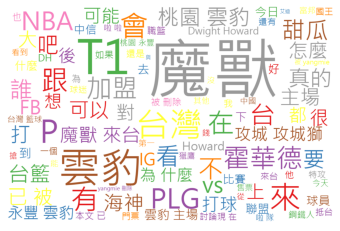

<Figure size 4000x4000 with 0 Axes>

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

c = jieba.cut_for_search(b) 
text=' '.join(c) 
stopwords = {}.fromkeys(['心得','新聞','閒聊','公告','情報','討論','專欄','問題','Live','Re','的','嗎','是不是','不是','了','是'])
wordcloud = WordCloud(font_path="C:/Windows/Fonts/MSJH.TTC", 
               background_color="white",
               stopwords=stopwords,       
               prefer_horizontal = 1,
               width=1080, height=720,
               max_words=100,
               colormap = "Set1")       
wordcloud.generate_from_text(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(20,20), dpi = 200)
plt.show()

In [6]:
wordcloud.to_file("wordcloud1.jpg")